<a href="https://colab.research.google.com/github/Magvride/Spotify-Recommendations/blob/main/Ci%C3%AAncia_de_Dados_G1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instala√ß√£o de pacotes necess√°rios




##
  - **Numpy** - **computa√ß√£o num√©rica** em Python
 - **Pandas** - Manipula√ß√£o e **an√°lise de dados**
 - **SciPy**- Escossistema para matem√°tica, ci√™ncia e engenharia
 - **Matplotlib** - **Visualiza√ß√µes** em Python
 - **Seaborn** - Visualiza√ß√£o estat√≠stica



In [2]:
import numpy as np
import pandas as pd
import scipy as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Carregamento do Dataset


In [3]:
#Carregar o dataset
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv'
df = pd.read_csv(url)

In [4]:
#Imprimir primeiras linhas do dataset
print(df.head())

                 track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxu

In [5]:
#Informa√ß√µes geral do dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

#Resumo estat√≠stico do dataset

In [ ]:
print(df.describe())

       track_popularity  danceability        energy           key  \
count      32833.000000  32833.000000  32833.000000  32833.000000   
mean          42.477081      0.654850      0.698619      5.374471   
std           24.984074      0.145085      0.180910      3.611657   
min            0.000000      0.000000      0.000175      0.000000   
25%           24.000000      0.563000      0.581000      2.000000   
50%           45.000000      0.672000      0.721000      6.000000   
75%           62.000000      0.761000      0.840000      9.000000   
max          100.000000      0.983000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  32833.000000  32833.000000  32833.000000  32833.000000   
mean      -6.719499      0.565711      0.107068      0.175334   
std        2.988436      0.495671      0.101314      0.219633   
min      -46.448000      0.000000      0.000000      0.000000   
25%       -8.171000      0.000000      0.041000      

#Medidas de tendencia central




## **Moda** para variables categoricas

In [ ]:
#Cria√ß√£o de uma lista com as columnas que quermos saber as medidas de tendencia central
#Se seleccionaron las variables que hacian mas sentido conocer la T.C
features = ['track_name', 'track_artist', 'playlist_genre', 'track_album_name']

###Um jeito de conhecer a moda de diferentes variaveis **.mode()**

In [ ]:
for feature in features:
  moda_val = df[feature].mode()[0]
  print()
  print(f"A moda do atributo {feature} √© {moda_val}")


A moda do atributo track_name √© Poison

A moda do atributo track_artist √© Martin Garrix

A moda do atributo playlist_genre √© edm

A moda do atributo track_album_name √© Greatest Hits


###Jeito de conhecer a moda com fun√ß√£o **.value_counts()**

In [ ]:
print(df["track_name"].value_counts().idxmax())
print(df['track_name'].value_counts().max())

Poison
22


##**Mediana** e **media** para variaveis numericas

In [ ]:
featuresNumericas = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

for featureNumerica in featuresNumericas:
  media_val= df[featureNumerica].median()
  print()
  print(f"A media de {featureNumerica} √© {media_val}")
  mediana_val = df[featureNumerica].mean()
  print(f"A mediana de {featureNumerica} √© {mediana_val}")



A media de danceability √© 0.672
A mediana de danceability √© 0.6548495202996985

A media de energy √© 0.721
A mediana de energy √© 0.6986192707032558

A media de key √© 6.0
A mediana de key √© 5.374470806810222

A media de loudness √© -6.166
A mediana de loudness √© -6.719499131970883

A media de mode √© 1.0
A mediana de mode √© 0.5657113270185484

A media de speechiness √© 0.0625
A mediana de speechiness √© 0.10706806871135749

A media de acousticness √© 0.0804
A mediana de acousticness √© 0.1753337150793409

A media de instrumentalness √© 1.61e-05
A mediana de instrumentalness √© 0.08474716133310999

A media de liveness √© 0.127
A mediana de liveness √© 0.19017619529132274

A media de valence √© 0.512
A mediana de valence √© 0.5105609737154692

A media de tempo √© 121.984
A mediana de tempo √© 120.88113154448268

A media de duration_ms √© 216000.0
A mediana de duration_ms √© 225799.811622453


##Graficos de tendencia central


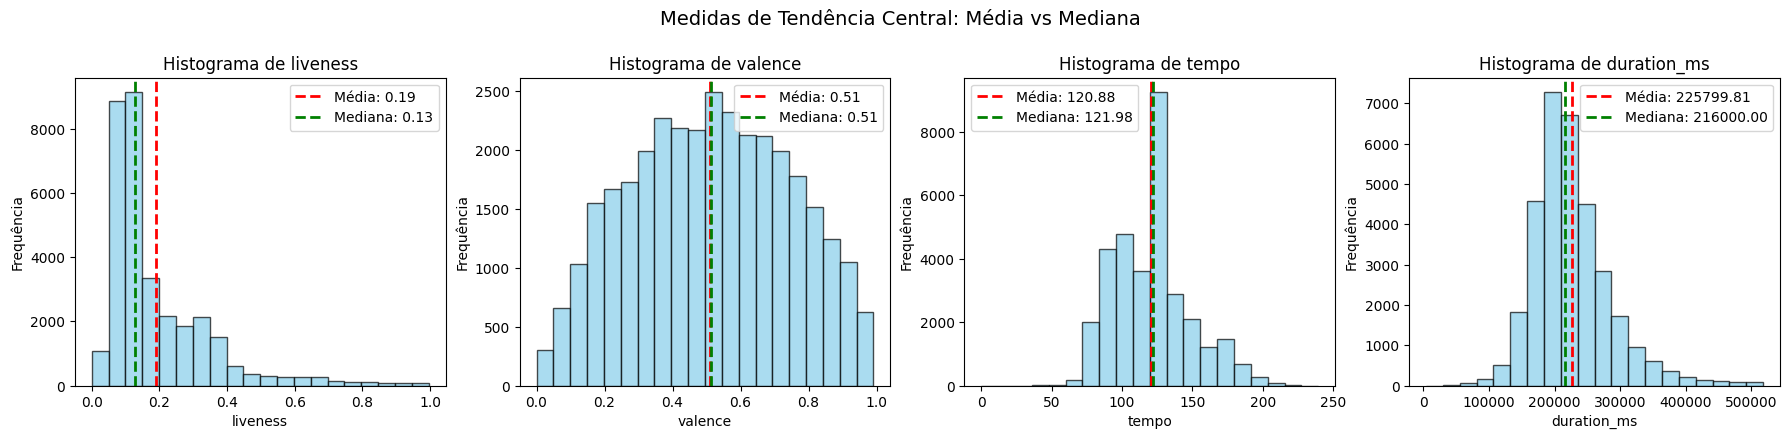

In [ ]:
featuresNumericas1 = ['liveness', 'valence', 'tempo', 'duration_ms']
fig, axes = plt.subplots(1, 4, figsize=(22, 4))
fig.suptitle('Medidas de Tend√™ncia Central: M√©dia vs Mediana', fontsize=14, y=1.05)

for idx, feature in enumerate(featuresNumericas1):
    ax = axes[idx]
    # Histograma
    ax.hist(df[feature], bins=20, alpha=0.7, color='skyblue', edgecolor='black')

    #Definir valores de media y mediana para no caer en el error de tener el mismo
    mean_val = df[feature].mean()
    median_val = df[feature].median()
    #Definir lineas que pasen por los histogramas
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'M√©dia: {mean_val:.2f}')
    ax.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Mediana: {median_val:.2f}')
    ax.legend() #colocar cuadrito indicando los valores

    #colocar titulo, nombre en x, nombre en y
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequ√™ncia')
    ax.set_title(f'Histograma de {feature}')


#Medidas de dispers√£o

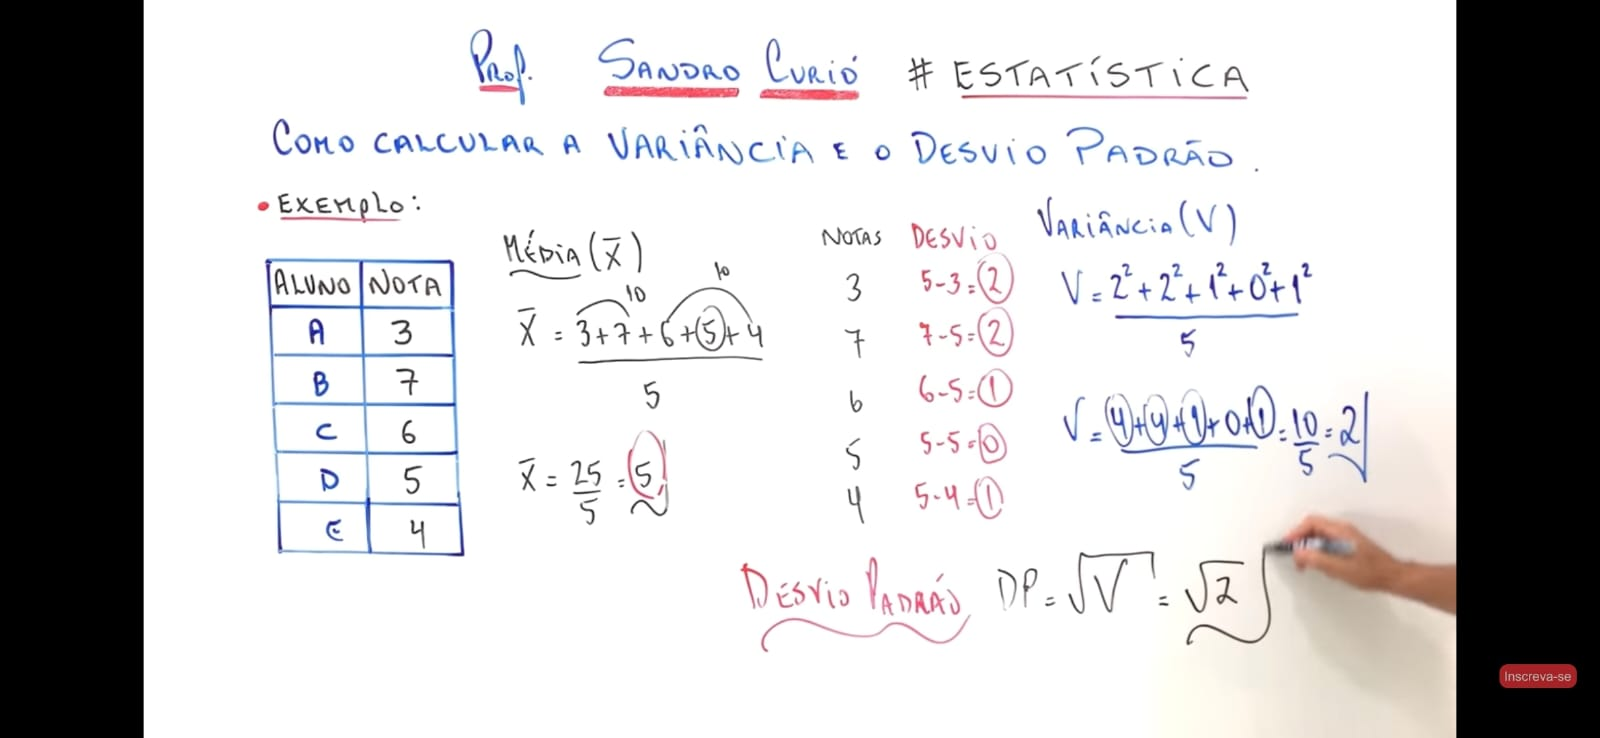

### Amplitude, Vari√¢ncia, Desvio Padr√£o e Coeficiente de Varia√ß√£o

> **Amplitude**: Diferen√ßa entre o maior e menor valor. Medida simples que indica o alcance total dos dados, mas muito sens√≠vel a outliers.
>
> **Vari√¢ncia**: M√©dia dos quadrados dos desvios em rela√ß√£o √† m√©dia. Mede o qu√£o espalhados est√£o os dados, mas em unidades quadradas.

**Cuanto mayor sea la varianza mayor dispersi√≥n existir√° y por tanto, menor representatividad tendr√° la media aritm√©tica**

Datos de temperatura en una ciudad

20, 10, 30  media  20  dispersi√≥n 3,16

---


20  20  20  media  20  dispersi√≥n 0

---


30  10  10  media  20  dispersion 3,8729

---



La media es la misma, pero claramente la variaci√≥n de temperatura en esa ciudad
es totalmente inestable en el caso 3 y estable en el caso 2.

>
> **Desvio Padr√£o**: Raiz quadrada da vari√¢ncia. Indica o quanto os dados se desviam da m√©dia, na mesma unidade dos dados originais. Regra emp√≠rica: ~68% dos dados est√£o dentro de ¬±1 desvio padr√£o.
>
> **Coeficiente de Varia√ß√£o**: Raz√£o entre desvio padr√£o e m√©dia (em %). Permite comparar variabilidade entre vari√°veis com diferentes escalas. CV < 10% indica baixa variabilidade.

In [15]:
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
for feature in features:
  print(f'{feature}')
  print(f"Desvio padr√£o : {df[feature].std()}")
  print(f"Varianza : {df[feature].var()}")
  print(f"Media : {df[feature].mean()}")
  print(f"Amplitude : {df[feature].max()-df[feature].min()}")
  print(f"CV : {df[feature].std()/df[feature].mean()}")
  print("\n")

danceability
Desvio padr√£o : 0.14508532044765107
Varianza : 0.021049750209397596
Media : 0.6548495202996985
Amplitude : 0.983
CV : 0.22155520612010424


energy
Desvio padr√£o : 0.18091003391959035
Varianza : 0.032728440372787326
Media : 0.6986192707032558
Amplitude : 0.999825
CV : 0.2589536840824326


key
Desvio padr√£o : 3.611657409603391
Varianza : 13.044069244343076
Media : 5.374470806810222
Amplitude : 11
CV : 0.6720024239459828


loudness
Desvio padr√£o : 2.9884363863324013
Varianza : 8.93075203515546
Media : -6.719499131970883
Amplitude : 47.723
CV : -0.4447409438768495


mode
Desvio padr√£o : 0.49567076220654116
Varianza : 0.24568950450641347
Media : 0.5657113270185484
Amplitude : 1
CV : 0.8761902732597914


speechiness
Desvio padr√£o : 0.1013141315112824
Varianza : 0.010264553243885425
Media : 0.10706806871135749
Amplitude : 0.918
CV : 0.9462590736031019


acousticness
Desvio padr√£o : 0.21963254030407992
Varianza : 0.04823845276042329
Media : 0.1753337150793409
Amplitude : 0.

El Coeficiente de Variaci√≥n (CV) mide la variabilidad relativa de tus datos en porcentaje, y lo que se considera ‚Äúdecente‚Äù o ‚Äúaceptable‚Äù depende mucho del campo de aplicaci√≥n y de qu√© tan homog√©neos se espera que sean los datos.

En t√©rminos generales:

üìä CV < 10% ‚Üí Variabilidad muy baja ‚Üí datos bastante homog√©neos.

üìä CV entre 10% y 20% ‚Üí Variabilidad moderada ‚Üí aceptable en la mayor√≠a de contextos.

üìä CV entre 20% y 30% ‚Üí Variabilidad relativamente alta ‚Üí hay dispersi√≥n importante, pero puede ser normal en algunos fen√≥menos sociales o biol√≥gicos.

üìä CV > 30% ‚Üí Variabilidad muy alta ‚Üí los datos son poco consistentes, puede indicar heterogeneidad fuerte o necesidad de investigar m√°s.

In [20]:
import pandas as pd

features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

df_cv = pd.DataFrame(columns=["caracteristica", "desvio_padrao", "cv", "variabilidad"])

for feature in features:
    std_val = df[feature].std()
    mean_val = df[feature].mean()
    cv = abs(std_val / mean_val)  # Coeficiente de variaci√≥n relativo

    # Definimos la etiqueta seg√∫n el CV
    if cv < 0.10:
        variabilidad = "Variabilidad muy baja"
    elif cv < 0.20:
        variabilidad = "Variabilidad moderada"
    elif cv < 0.30:
        variabilidad = "Variabilidad relativamente alta"
    else:
        variabilidad = "Variabilidad muy alta"

    # A√±adimos la fila al DataFrame
    df_cv = pd.concat([df_cv, pd.DataFrame([{
        "caracteristica": feature,
        "desvio_padrao": std_val,
        "cv": cv,
        "variabilidad": variabilidad
    }])], ignore_index=True)

# Mostramos el DataFrame
pd.set_option("display.float_format", "{:.4f}".format)  # opcional, para n√∫meros m√°s bonitos
df_cv


/tmp/ipython-input-2616220258.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_cv = pd.concat([df_cv, pd.DataFrame([{


caracteristica  desvio_padrao     cv                     variabilidad
0       danceability         0.1451 0.2216  Variabilidad relativamente alta
1             energy         0.1809 0.2590  Variabilidad relativamente alta
2                key         3.6117 0.6720            Variabilidad muy alta
3           loudness         2.9884 0.4447            Variabilidad muy alta
4               mode         0.4957 0.8762            Variabilidad muy alta
5        speechiness         0.1013 0.9463            Variabilidad muy alta
6       acousticness         0.2196 1.2527            Variabilidad muy alta
7   instrumentalness         0.2242 2.6459            Variabilidad muy alta
8           liveness         0.1543 0.8114            Variabilidad muy alta
9            valence         0.2331 0.4566            Variabilidad muy alta
10             tempo        26.9036 0.2226  Variabilidad relativamente alta
11       duration_ms     59834.0062 0.2650  Variabilidad relativamente alta

1Ô∏è‚É£ Sobre la variabilidad de las variables key hasta valence

**key:** representa la tonalidad de la canci√≥n (0 a 11). Es una variable discreta que puede tomar valores muy distintos entre canciones, por eso tiene un CV alto (~0.67). Eso es esperado, porque las canciones no est√°n concentradas en una sola tonalidad.

**mode:** indica mayormente si la canci√≥n est√° en modo mayor o menor (0 o 1). Aunque es binaria, si la media est√° cerca de 0 o 1, el CV puede ser muy alto porque el denominador (media) es peque√±o, incluso llegando a valores mayores a 1.

**speechiness:** mide cu√°n hablada es la pista. Las canciones var√≠an mucho en esto (desde 0 hasta casi 1), entonces es natural un CV alto.

**acousticness e instrumentalness:** tambi√©n son proporciones entre 0 y 1, pero muchas canciones tienen valores cercanos a 0 (muy poca instrumentalidad o ac√∫stico). Si la media es muy peque√±a, el CV = std / media puede ser >1, lo que explica los valores altos.

**liveness y valence:** son caracter√≠sticas que dependen del contenido y emoci√≥n de la canci√≥n. La m√∫sica es muy heterog√©nea, por eso CV alto tambi√©n tiene sentido.

üí° Conclusi√≥n: No es extra√±o que estas variables tengan alta variabilidad. Muchas **son proporciones o categor√≠as discretas con distribuciones no centradas en la media, lo que provoca CV altos**.

## Problema 1 : Speechiness

A continuaci√≥n para entender que nos quiere decir las medidas de dispersi√≥n, se realiz√≥ una comparaci√≥n para la variable **Speechiness** en la canci√≥n m√°s escuchada, para entender cual seria el valor de Speechiness m√°s frecuente.

Sin embargo se est√° teniendo una contradicci√≥n porque el valor de **Speechiness** est√° siendo diferente para la misma canci√≥n, lo que genera una duda en cuanto a la consistencia de los datos dentro del contexto de la m√∫sica.

###Marco Teorico de la variables **Speechiness**

üéµ Speechiness mide qu√© tanto una canci√≥n se parece a la habla (voz hablada).

üîπ Cerca de 1.0 ‚Üí casi todo es hablado (ej: audiolibro, podcast, charla, poes√≠a).

üîπ Entre 0.33 y 0.66 ‚Üí mezcla de m√∫sica y partes habladas (ej: rap, canciones con recitados o secciones habladas).

üîπ Menos de 0.33 ‚Üí es principalmente m√∫sica, con muy poca o nada de voz hablada.

üëâ O sea: cuanto m√°s alto es el valor de speechiness, m√°s ‚Äúparecida a hablar‚Äù es la pista; cuanto m√°s bajo, m√°s es m√∫sica ‚Äútradicional‚Äù.

In [24]:
df.loc[df['track_name']=='Poison', 'speechiness']

2242     0.0542
6751     0.2660
10304    0.0455
12250    0.1090
12863    0.1090
13078    0.1090
13304    0.1170
14955    0.1090
15280    0.1170
15396    0.1090
21765    0.0650
23176    0.0455
23192    0.1350
24061    0.2100
24126    0.1920
24268    0.2030
24420    0.2100
24482    0.2280
24683    0.2160
24787    0.2100
27677    0.0363
30280    0.0455
Name: speechiness, dtype: float64

###**Soluci√≥n**

El posible motivo por el cual **Speechiness** sea diferente siendo la misma canci√≥n, es porque es **interpretada por artistas diferentes, lo cual genera un cambio en esta variable**



In [9]:
Posion_dataFrame = df[df["track_name"] == "Poison"][["track_name","track_artist","speechiness"]]
print(Posion_dataFrame)
print(Posion_dataFrame.info())

      track_name      track_artist  speechiness
2242      Poison          Rita Ora       0.0542
6751      Poison  Sidhu Moose Wala       0.2660
10304     Poison            Coopex       0.0455
12250     Poison      Alice Cooper       0.1090
12863     Poison      Alice Cooper       0.1090
13078     Poison      Alice Cooper       0.1090
13304     Poison      Alice Cooper       0.1170
14955     Poison      Alice Cooper       0.1090
15280     Poison      Alice Cooper       0.1170
15396     Poison      Alice Cooper       0.1090
21765     Poison      Brent Faiyaz       0.0650
23176     Poison            Coopex       0.0455
23192     Poison             Awich       0.1350
24061     Poison    Bell Biv DeVoe       0.2100
24126     Poison    Bell Biv DeVoe       0.1920
24268     Poison    Bell Biv DeVoe       0.2030
24420     Poison    Bell Biv DeVoe       0.2100
24482     Poison    Bell Biv DeVoe       0.2280
24683     Poison    Bell Biv DeVoe       0.2160
24787     Poison    Bell Biv DeVoe      

**Conclusi√≥n**

1. La variable Speechiness **puede llegar a depender del artista**, no depende unicamente de la canci√≥n.
2. Una misma canci√≥n puede tener un **Speechiness** diferente

**Consideraciones futuras**
1.Si la variable depende del artista, eso quiere decir que al momento de crear una solicitud de recomendaci√≥n dependiendo de la **musica**, se tiene que considerar que va a depender tambi√©n del artista que interpreta.

Ejemplo

El hecho que a mi me guste la canci√≥n *Coraz√≥n Partido del Grupo menos √© mais*, no quiere decir que me guste la misma canci√≥n *Coraz√≥n partido de Alejandro Sanzs*.

###Visualizaci√≥n del concepto de desvio padrao

**Speechiness** mide la proporci√≥n de voz hablada dentro de la canci√≥n, en una escala de 0 a 1.

media 0.1336818181818182
Desviaci√≥n estandar 0.07115036148463295
Coeficiente de variaci√≥n 53.22366381033405


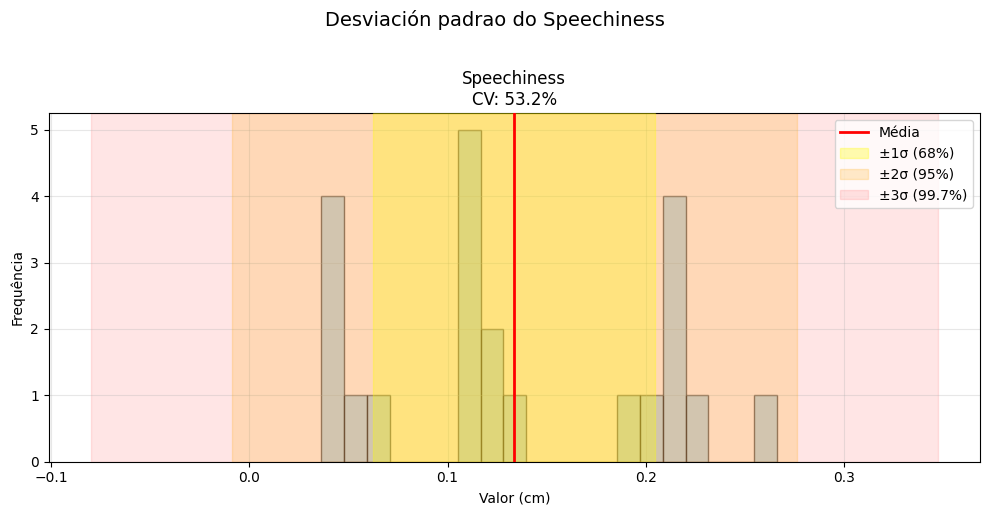

In [11]:
fig, ax= plt.subplots(1,1,figsize=(10,5))
fig.suptitle("Desviaci√≥n padrao do Speechiness", fontsize=14, y=1.02)
feature= 'speechiness'
mean = Posion_dataFrame[feature].mean()
std = Posion_dataFrame[feature].std()
cv = (std/mean) * 100

print(f"media {mean}")
print(f"Desviaci√≥n estandar {std}")
print(f"Coeficiente de variaci√≥n {cv}")
count, bins, patches = ax.hist(Posion_dataFrame[feature], bins=20, alpha=0.5, color='skyblue', edgecolor='black')
# Linha da m√©dia
ax.axvline(mean, color='red', linewidth=2, label='M√©dia', zorder=5)
# Faixas de desvio padr√£o
ax.axvspan(mean-std, mean+std, alpha=0.3, color='yellow', label='¬±1œÉ (68%)', zorder=3)
ax.axvspan(mean-2*std, mean+2*std, alpha=0.2, color='orange', label='¬±2œÉ (95%)', zorder=2)
ax.axvspan(mean-3*std, mean+3*std, alpha=0.1, color='red', label='¬±3œÉ (99.7%)', zorder=1)

ax.set_title(f'{feature.replace("_", " ").title()}\nCV: {cv:.1f}%')
ax.set_xlabel('Valor (cm)')
ax.set_ylabel('Frequ√™ncia')
ax.legend(fontsize=10, loc='upper right')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


###Interpretaci√≥n dos dados

Cada unos de los intervalos coloridos representa las diferentes concentraciones de los datos. Al momento de hacer la suma de las frecuencias, se percibe que tenemos un total de 22 canciones con nombre "Poison", donde, la mayor√≠a de ellas se encuentra en un speechiness entre los valores de ~0.06 y ~0.2.

Explicaci√≥n por si no recordamos la desviaci√≥n

La media de Speechiness de la canci√≥n Poison es de 0.13, mientras que la desviaci√≥n estandar es de 0.07, eso quiere decir que una desviaci√≥n est√°ndar a la derecha es de 0.2 y una desviaci√≥n est√°ndar a la izquierda es de 0.06.

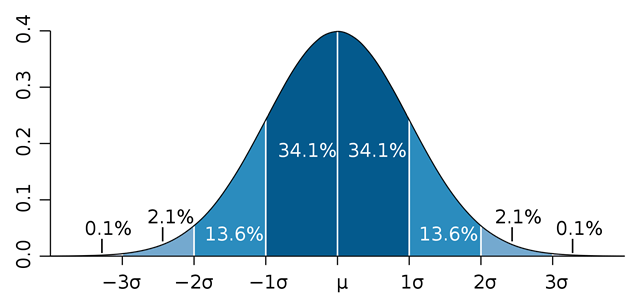


Como podr√≠a esto ayudarnos a futuro en el proyecto?

El hecho de reconocer que una misma canci√≥n tenga un speechiness variable, ayuda a reconocer que la probabilidad de una persona gustar de una canci√≥n **NO depende √∫nicamente de la canci√≥n, sino tambi√©n de las caracter√≠sticas que acompanhan la canci√≥n** , donde al momento de implementar el modelo podriamos solo considerar el 68% de la media de speechiness de una canci√≥n para tener mas probabilidades de acertar.

##Funci√≥n para calcular dispersi√≥n en cada variable

In [24]:
def desvio(feature1):
        df.loc[df['track_name']=='Poison', feature1]
        feature_dataFrame = df[df["track_name"] == "Poison"][["track_name","track_artist",feature1]]
        print(feature_dataFrame)

        fig, ax= plt.subplots(1,1,figsize=(10,5))
        fig.suptitle(f"Desviaci√≥n padrao do {feature1}", fontsize=14, y=1.02)

        mean = feature_dataFrame[feature1].mean()
        std = feature_dataFrame[feature1].std()
        cv = (std/mean) * 100

        print(f"media : {mean}")
        print(f"Desviaci√≥n estandar : {std}")
        print(f"Coeficiente de variaci√≥n : {cv}")
        count, bins, patches = ax.hist(feature_dataFrame[feature1], bins=20, alpha=0.5, color='skyblue', edgecolor='black')
        # Linha da m√©dia
        ax.axvline(mean, color='red', linewidth=2, label='M√©dia', zorder=5)
        # Faixas de desvio padr√£o
        ax.axvspan(mean-std, mean+std, alpha=0.3, color='yellow', label='¬±1œÉ (68%)', zorder=3)
        ax.axvspan(mean-2*std, mean+2*std, alpha=0.2, color='orange', label='¬±2œÉ (95%)', zorder=2)
        ax.axvspan(mean-3*std, mean+3*std, alpha=0.1, color='red', label='¬±3œÉ (99.7%)', zorder=1)

        ax.set_title(f'{feature1.replace("_", " ").title()}\nCV: {cv:.1f}%')
        ax.set_xlabel('Valor (cm)')
        ax.set_ylabel('Frequ√™ncia')
        ax.legend(fontsize=10, loc='upper right')
        ax.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

##Key : valores de 0 a 11

      track_name      track_artist  key
2242      Poison          Rita Ora   10
6751      Poison  Sidhu Moose Wala    6
10304     Poison            Coopex    7
12250     Poison      Alice Cooper    2
12863     Poison      Alice Cooper    2
13078     Poison      Alice Cooper    2
13304     Poison      Alice Cooper    2
14955     Poison      Alice Cooper    2
15280     Poison      Alice Cooper    2
15396     Poison      Alice Cooper    2
21765     Poison      Brent Faiyaz    2
23176     Poison            Coopex    7
23192     Poison             Awich    9
24061     Poison    Bell Biv DeVoe    6
24126     Poison    Bell Biv DeVoe    6
24268     Poison    Bell Biv DeVoe    6
24420     Poison    Bell Biv DeVoe    6
24482     Poison    Bell Biv DeVoe    6
24683     Poison    Bell Biv DeVoe    6
24787     Poison    Bell Biv DeVoe    6
27677     Poison     Martin Garrix    7
30280     Poison            Coopex    7
media : 5.045454545454546
Desviaci√≥n estandar : 2.5537511667437416
Coeficiente 

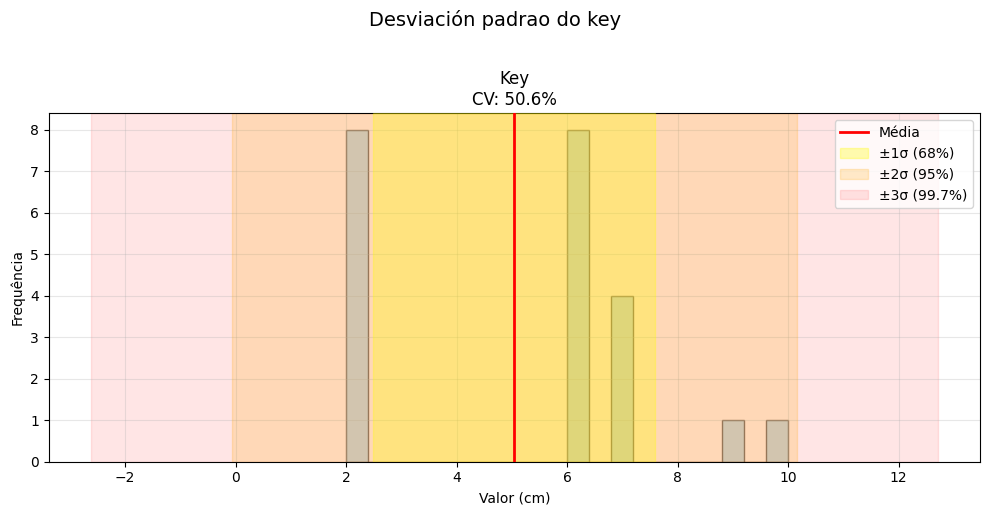

In [25]:
feature1="key"
desvio(feature1)

¬øPor qu√© la misma canci√≥n tiene diferentes valores de key?

Versiones diferentes: En tu tabla hay varios artistas que tienen canciones llamadas ‚ÄúPoison‚Äù. Aunque el nombre es igual, son canciones distintas, por lo que su key puede variar.

Ejemplo: "Poison" de Rita Ora est√° en A‚ôØ/B‚ô≠ (key = 10) y "Poison" de Alice Cooper est√° en D (key = 2).

##Danceability : rango de 0 a 1

Danceability es una m√©trica de Spotify que mide qu√© tan f√°cil es bailar una canci√≥n seg√∫n su ritmo, tempo, regularidad y patrones musicales.

Detalles de Danceability

Rango: 0 a 1

0 ‚Üí Poco bailable

1 ‚Üí Muy bailable

Qu√© analiza:

Tempo: canciones con un ritmo constante y adecuado para bailar suelen tener danceability alta.

Regularidad del beat: un pulso predecible ayuda a seguir la canci√≥n con movimientos r√≠tmicos.

Estilo musical: g√©neros como pop, reggaet√≥n, EDM tienden a tener valores altos, mientras que baladas lentas o jazz libre suelen tener valores bajos.

Ejemplos pr√°cticos

Sexy Bitch ‚Üí danceability alta (f√°cil de bailar).

Llorona ‚Üí danceability baja (m√°s lenta, emotiva, dif√≠cil de bailar).

      track_name      track_artist  danceability
2242      Poison          Rita Ora        0.5790
6751      Poison  Sidhu Moose Wala        0.6780
10304     Poison            Coopex        0.4280
12250     Poison      Alice Cooper        0.2800
12863     Poison      Alice Cooper        0.2800
13078     Poison      Alice Cooper        0.3000
13304     Poison      Alice Cooper        0.3040
14955     Poison      Alice Cooper        0.3000
15280     Poison      Alice Cooper        0.3040
15396     Poison      Alice Cooper        0.2800
21765     Poison      Brent Faiyaz        0.6890
23176     Poison            Coopex        0.4280
23192     Poison             Awich        0.6040
24061     Poison    Bell Biv DeVoe        0.8360
24126     Poison    Bell Biv DeVoe        0.8410
24268     Poison    Bell Biv DeVoe        0.8370
24420     Poison    Bell Biv DeVoe        0.8400
24482     Poison    Bell Biv DeVoe        0.8450
24683     Poison    Bell Biv DeVoe        0.8450
24787     Poison    

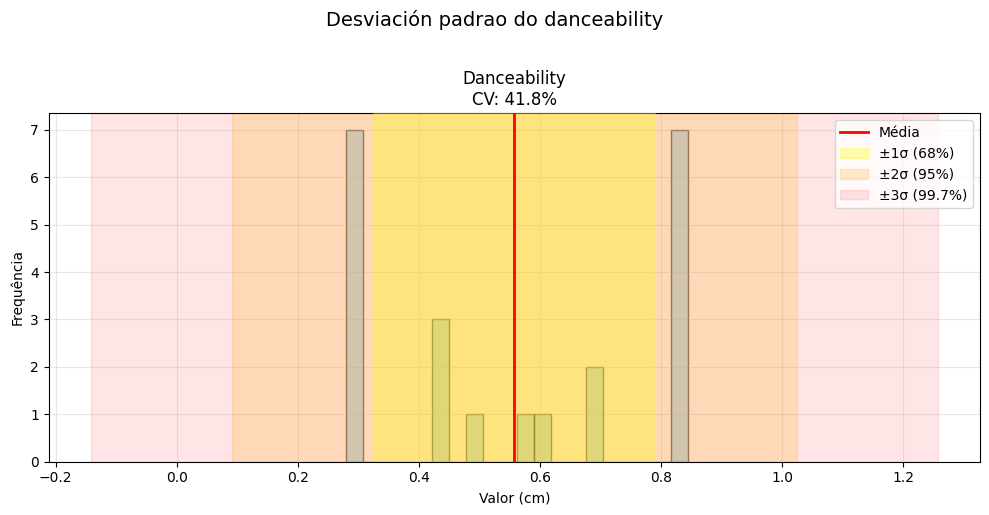

In [28]:
feature1 = 'danceability'
desvio(feature1)

##Loudness : rango de -60 db a 0db

Loudness es una m√©trica de Spotify que mide el volumen percibido promedio de una canci√≥n, es decir, qu√© tan ‚Äúfuerte‚Äù suena.

Detalles de Loudness

Unidad: decibelios (dB)

Rango t√≠pico: aproximadamente de -60 dB (muy suave) a 0 dB (muy fuerte)

Qu√© significa:

Valores m√°s altos (cercanos a 0 dB) ‚Üí canci√≥n muy fuerte o intensa.

Valores m√°s bajos (m√°s negativos) ‚Üí canci√≥n suave o tranquila.

Ejemplo pr√°ctico

Una canci√≥n de EDM o rock puede tener loudness alto (-5 a -3 dB).

Una balada ac√∫stica puede tener loudness bajo (-20 a -10 dB).

üí° Tip: Loudness no mide la energ√≠a emocional ni el tempo, solo el volumen promedio percibido. Para energ√≠a percibida, se usa la m√©trica energy.

      track_name      track_artist  loudness
2242      Poison          Rita Ora   -5.7110
6751      Poison  Sidhu Moose Wala   -3.7010
10304     Poison            Coopex   -9.2950
12250     Poison      Alice Cooper   -5.5090
12863     Poison      Alice Cooper   -5.5090
13078     Poison      Alice Cooper   -7.7860
13304     Poison      Alice Cooper   -6.0960
14955     Poison      Alice Cooper   -7.7860
15280     Poison      Alice Cooper   -6.0960
15396     Poison      Alice Cooper   -5.5090
21765     Poison      Brent Faiyaz  -10.1020
23176     Poison            Coopex   -9.2950
23192     Poison             Awich   -4.4040
24061     Poison    Bell Biv DeVoe   -9.3760
24126     Poison    Bell Biv DeVoe   -6.3650
24268     Poison    Bell Biv DeVoe   -7.3120
24420     Poison    Bell Biv DeVoe  -10.5300
24482     Poison    Bell Biv DeVoe   -7.5260
24683     Poison    Bell Biv DeVoe   -7.5040
24787     Poison    Bell Biv DeVoe  -10.5300
27677     Poison     Martin Garrix   -6.1180
30280     

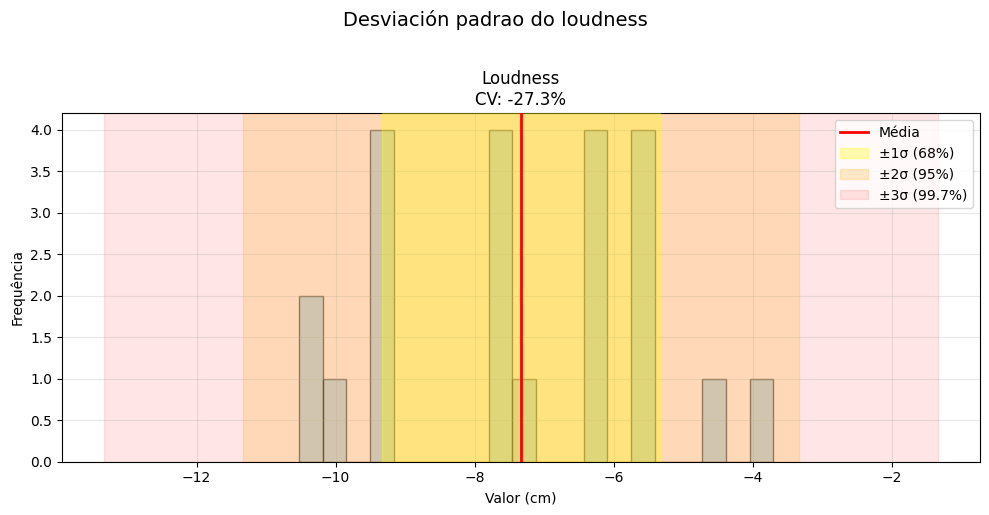

In [30]:
feature1='loudness'
desvio(feature1)

##Mode : esta variable solo tiene 0 o 1


la variable mode solo indica si la tonalidad es mayor (1) o menor (0). No codifica emociones complejas como rabia, miedo o sorpresa.

**Modo mayor (1)** ‚Üí t√≠picamente asociado con sensaciones alegres o positivas.

**Modo menor (0)** ‚Üí t√≠picamente asociado con sensaciones melanc√≥licas o tristes.

Pero emociones como rabia, tensi√≥n o euforia no se capturan solo con mode. Para eso existen otras variables en Spotify o en datasets de audio:

**energy** ‚Üí intensidad o ‚Äúfuerza‚Äù de la canci√≥n, alta puede transmitir rabia o euforia.

**valence** ‚Üí positividad emocional, bajo puede ser tristeza, medio puede ser ambivalente.

**tempo** ‚Üí velocidad, puede influir en excitaci√≥n o nerviosismo.

**loudness** ‚Üí volumen percibido, canciones muy fuertes pueden transmitir agresividad.

Entonces, mode es solo una parte del ‚Äúsentimiento‚Äù musical, y para emociones m√°s complejas necesitas combinar varias variables.

      track_name      track_artist  mode
2242      Poison          Rita Ora     1
6751      Poison  Sidhu Moose Wala     0
10304     Poison            Coopex     0
12250     Poison      Alice Cooper     0
12863     Poison      Alice Cooper     0
13078     Poison      Alice Cooper     0
13304     Poison      Alice Cooper     0
14955     Poison      Alice Cooper     0
15280     Poison      Alice Cooper     0
15396     Poison      Alice Cooper     0
21765     Poison      Brent Faiyaz     0
23176     Poison            Coopex     0
23192     Poison             Awich     1
24061     Poison    Bell Biv DeVoe     0
24126     Poison    Bell Biv DeVoe     0
24268     Poison    Bell Biv DeVoe     0
24420     Poison    Bell Biv DeVoe     0
24482     Poison    Bell Biv DeVoe     0
24683     Poison    Bell Biv DeVoe     0
24787     Poison    Bell Biv DeVoe     0
27677     Poison     Martin Garrix     0
30280     Poison            Coopex     0
media : 0.09090909090909091
Desviaci√≥n estandar : 0.2942

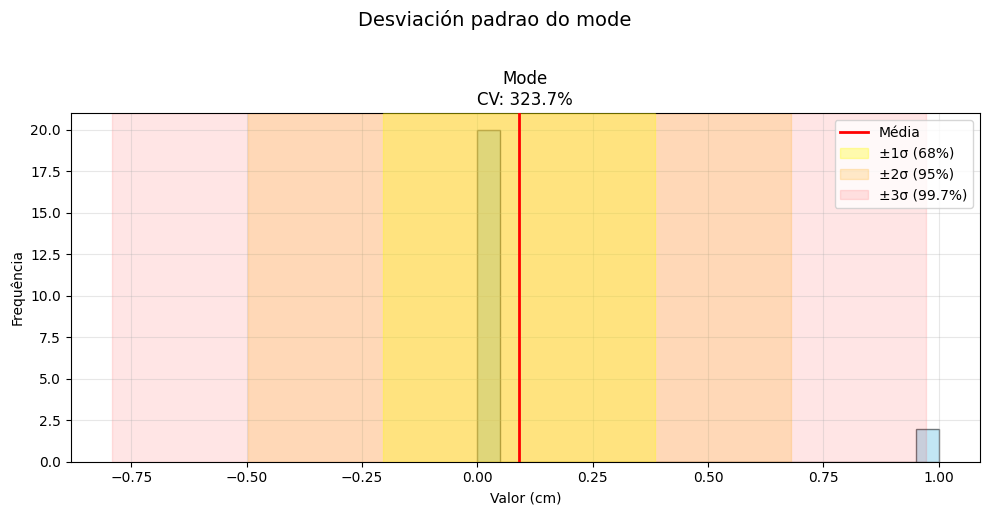

In [32]:
feature='mode'
desvio(feature)

##Acousticness : rango de 0 a 1

En los datasets de m√∫sica como los de Spotify, acousticness es una medida que indica qu√© tan ‚Äúac√∫stica‚Äù es una canci√≥n. Es un valor continuo que va de 0 a 1:

0 ‚Üí poca probabilidad de ser ac√∫stica, la canci√≥n probablemente tenga muchos instrumentos electr√≥nicos o sintetizados.

1 ‚Üí muy alta probabilidad de ser ac√∫stica, es decir, la canci√≥n suena m√°s natural, con instrumentos ac√∫sticos como guitarra, piano, voz sin efectos electr√≥nicos, etc.

**Ejemplo**

‚ÄúLlorona‚Äù (dependiendo de la versi√≥n que se analice) suele ser una canci√≥n tradicional, con instrumentos ac√∫sticos como guitarra, voz sin muchos efectos electr√≥nicos. Por eso, su acousticness ser√≠a relativamente alta, m√°s cercana a 1.

‚ÄúSexy Bitch‚Äù de David Guetta ft. Akon es una canci√≥n electr√≥nica/dance, con muchos sintetizadores, beats producidos digitalmente y efectos electr√≥nicos. Por lo tanto, su acousticness ser√≠a baja, cercana a 0.

      track_name      track_artist  acousticness
2242      Poison          Rita Ora        0.0821
6751      Poison  Sidhu Moose Wala        0.0543
10304     Poison            Coopex        0.2610
12250     Poison      Alice Cooper        0.0327
12863     Poison      Alice Cooper        0.0327
13078     Poison      Alice Cooper        0.0515
13304     Poison      Alice Cooper        0.0524
14955     Poison      Alice Cooper        0.0515
15280     Poison      Alice Cooper        0.0524
15396     Poison      Alice Cooper        0.0327
21765     Poison      Brent Faiyaz        0.7110
23176     Poison            Coopex        0.2610
23192     Poison             Awich        0.1720
24061     Poison    Bell Biv DeVoe        0.0021
24126     Poison    Bell Biv DeVoe        0.0022
24268     Poison    Bell Biv DeVoe        0.0019
24420     Poison    Bell Biv DeVoe        0.0019
24482     Poison    Bell Biv DeVoe        0.0062
24683     Poison    Bell Biv DeVoe        0.0043
24787     Poison    

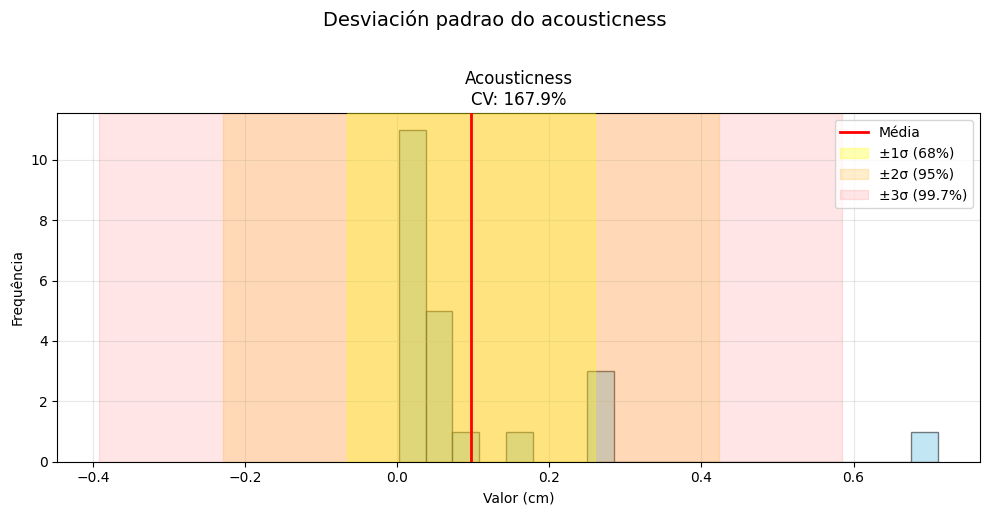

In [33]:
feature1='acousticness'
desvio(feature1)

##Instrumentalness : Probabilidad de 0 a 1

Qu√© tan ‚Äúinstrumental‚Äù es la canci√≥n, es decir, la probabilidad de que no haya voces humanas presentes.

Rango de valores: 0 a 1 (0 = probablemente hay voces, 1 = probablemente no hay voces).

Ejemplo: Una pista de piano solo o una canci√≥n de orquesta sin cantantes tendr√≠a un instrumentalness alto. Una canci√≥n pop con cantante principal tendr√≠a un instrumentalness bajo, aunque use instrumentos ac√∫sticos.

      track_name      track_artist  instrumentalness
2242      Poison          Rita Ora            0.0000
6751      Poison  Sidhu Moose Wala            0.0000
10304     Poison            Coopex            0.0005
12250     Poison      Alice Cooper            0.0000
12863     Poison      Alice Cooper            0.0000
13078     Poison      Alice Cooper            0.0003
13304     Poison      Alice Cooper            0.0000
14955     Poison      Alice Cooper            0.0003
15280     Poison      Alice Cooper            0.0000
15396     Poison      Alice Cooper            0.0000
21765     Poison      Brent Faiyaz            0.0009
23176     Poison            Coopex            0.0005
23192     Poison             Awich            0.0000
24061     Poison    Bell Biv DeVoe            0.0018
24126     Poison    Bell Biv DeVoe            0.0027
24268     Poison    Bell Biv DeVoe            0.0016
24420     Poison    Bell Biv DeVoe            0.0042
24482     Poison    Bell Biv DeVoe            

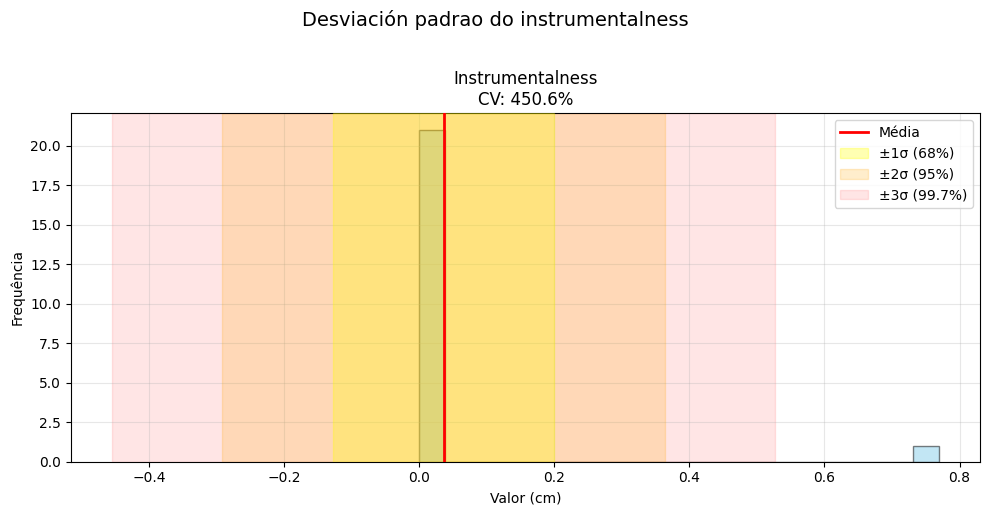

In [34]:
feature1='instrumentalness'
desvio(feature1)

##Liveness : Probabilidad de 0 a 1

Detalles de Liveness

Rango: 0 a 1

0 ‚Üí Muy poco probable que sea en vivo.

1 ‚Üí Muy probable que sea en vivo.

Qu√© detecta: Sonidos t√≠picos de un concierto o presentaci√≥n en vivo, como:

Aplausos o v√≠tores de la audiencia.

Eco o reverberaci√≥n de un espacio grande.

Interacci√≥n de los m√∫sicos con el p√∫blico.

Ejemplo pr√°ctico

Una grabaci√≥n de estudio de una canci√≥n pop tendr√≠a liveness bajo (0.1‚Äì0.3).

Una versi√≥n en vivo de una canci√≥n de rock en un estadio podr√≠a tener liveness alto (0.7‚Äì0.9).

      track_name      track_artist  liveness
2242      Poison          Rita Ora    0.2320
6751      Poison  Sidhu Moose Wala    0.2410
10304     Poison            Coopex    0.0934
12250     Poison      Alice Cooper    0.1800
12863     Poison      Alice Cooper    0.1800
13078     Poison      Alice Cooper    0.1250
13304     Poison      Alice Cooper    0.1110
14955     Poison      Alice Cooper    0.1250
15280     Poison      Alice Cooper    0.1110
15396     Poison      Alice Cooper    0.1800
21765     Poison      Brent Faiyaz    0.0859
23176     Poison            Coopex    0.0934
23192     Poison             Awich    0.1310
24061     Poison    Bell Biv DeVoe    0.6340
24126     Poison    Bell Biv DeVoe    0.6270
24268     Poison    Bell Biv DeVoe    0.5990
24420     Poison    Bell Biv DeVoe    0.6330
24482     Poison    Bell Biv DeVoe    0.5030
24683     Poison    Bell Biv DeVoe    0.4890
24787     Poison    Bell Biv DeVoe    0.6330
27677     Poison     Martin Garrix    0.3770
30280     

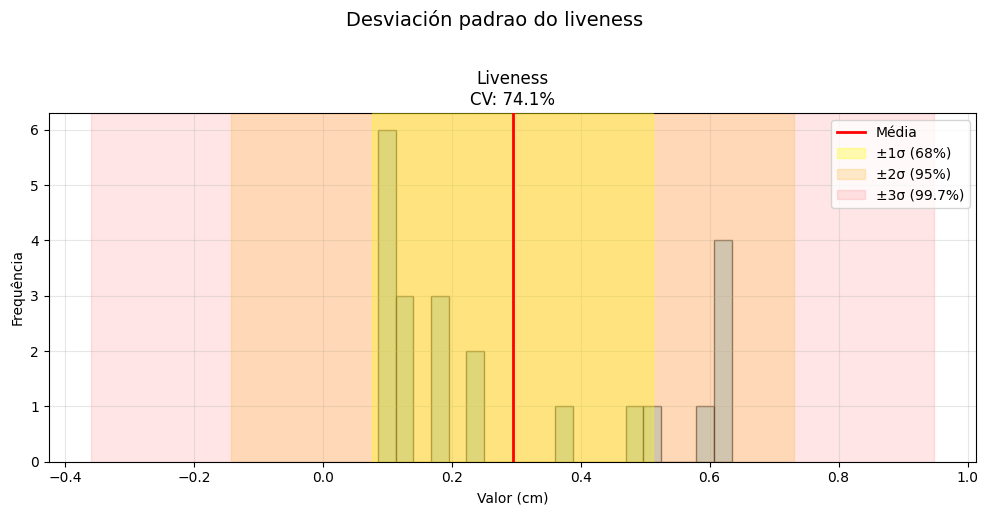

In [35]:
feature1='liveness'
desvio(feature1)

##Valence : Rango de 0 a 1

**Detalles de Valence**

Rango: 0 a 1

0 ‚Üí Muy baja valencia ‚Üí canci√≥n triste, melanc√≥lica o negativa.

1 ‚Üí Muy alta valencia ‚Üí canci√≥n feliz, alegre o positiva.

Qu√© detecta: La ‚Äúsensaci√≥n‚Äù general que transmite la canci√≥n seg√∫n el an√°lisis de ritmo, tonalidad, tempo y otros elementos ac√∫sticos.

**Ejemplos pr√°cticos**

Una balada triste o una canci√≥n melanc√≥lica ‚Üí valence baja.

Una canci√≥n pop divertida o una canci√≥n de fiesta ‚Üí valence alta.

      track_name      track_artist  valence
2242      Poison          Rita Ora   0.4310
6751      Poison  Sidhu Moose Wala   0.4350
10304     Poison            Coopex   0.0520
12250     Poison      Alice Cooper   0.2600
12863     Poison      Alice Cooper   0.2600
13078     Poison      Alice Cooper   0.2680
13304     Poison      Alice Cooper   0.3050
14955     Poison      Alice Cooper   0.2680
15280     Poison      Alice Cooper   0.3050
15396     Poison      Alice Cooper   0.2600
21765     Poison      Brent Faiyaz   0.3820
23176     Poison            Coopex   0.0520
23192     Poison             Awich   0.7920
24061     Poison    Bell Biv DeVoe   0.7830
24126     Poison    Bell Biv DeVoe   0.8020
24268     Poison    Bell Biv DeVoe   0.7610
24420     Poison    Bell Biv DeVoe   0.7750
24482     Poison    Bell Biv DeVoe   0.6760
24683     Poison    Bell Biv DeVoe   0.6500
24787     Poison    Bell Biv DeVoe   0.7750
27677     Poison     Martin Garrix   0.0620
30280     Poison            Coop

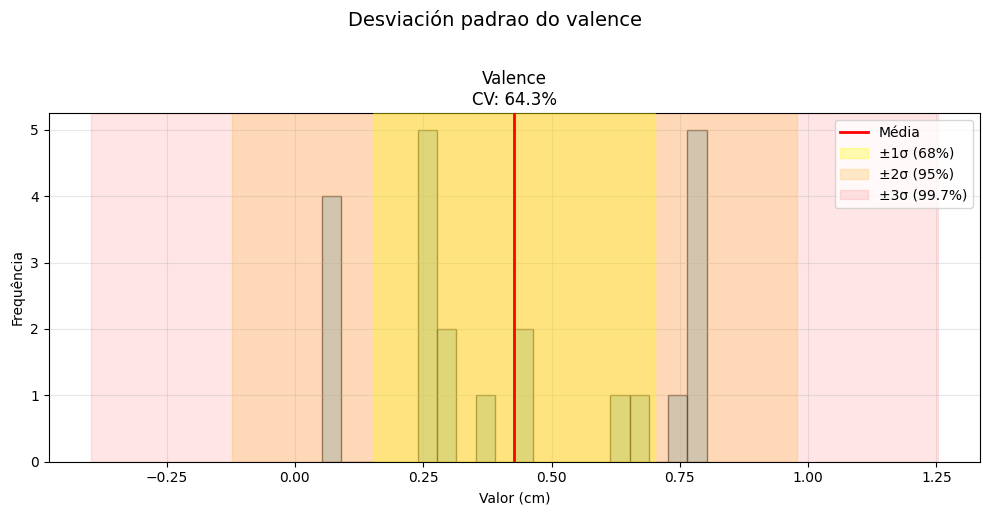

In [36]:
feature1='valence'
desvio(feature1)

| M√©trica              | Rango t√≠pico en canciones | Comentario                                                                    |
| -------------------- | ------------------------- | ----------------------------------------------------------------------------- |
| **Acousticness**     | 0.0 ‚Äì 1.0                 | 0 = nada ac√∫stica, 1 = totalmente ac√∫stica                                    |
| **Instrumentalness** | 0.0 ‚Äì 1.0                 | 0 = hay voces, 1 = sin voces                                                  |
| **Liveness**         | 0.1 ‚Äì 0.9                 | Valores cercanos a 1 indican grabaci√≥n en vivo; rara vez es exactamente 0 o 1 |
| **Valence**          | 0.0 ‚Äì 1.0                 | 0 = triste/negativa, 1 = alegre/positiva                                      |
| **Danceability**     | 0.2 ‚Äì 0.95                | Raras canciones tienen <0.2 o >0.95                                           |
| **Loudness**         | -60 dB ‚Äì 0 dB             | Canciones muy suaves ~-40 dB, muy fuertes ~-5 dB                              |
| **Energy**           | 0.1 ‚Äì 0.95                | 0 = tranquila, 1 = muy intensa                                                |
| **Key**              | 0 ‚Äì 11                    | 0 = C, 1 = C‚ôØ/D‚ô≠ ‚Ä¶ 11 = B                                                     |
| **Mode**             | 0 ‚Äì 1                     | 0 = menor, 1 = mayor                                                          |
|**Speechiness**       | 0 ‚Äì 1                      | 0 = Poca presencia de voz, 1 = Predominante palabras habladas (audiolibros, podcast, rap)
